<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/CountVectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8e72218c-391e-63d2-0171-910c1182047f)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [12]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [13]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
#!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [15]:
df=pd.read_csv('bbc_text_cls.csv')

In [16]:
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [17]:
X=df['text']

In [18]:
X

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: text, Length: 2225, dtype: object

In [19]:
y=df['labels']

In [20]:
y

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: labels, Length: 2225, dtype: object

<Axes: xlabel='labels', ylabel='Count'>

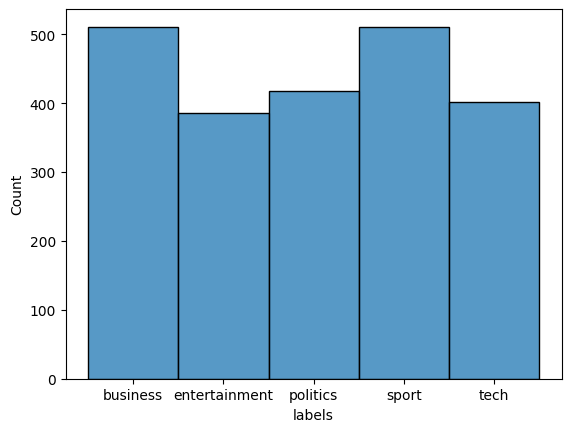

In [21]:
sns.histplot(df['labels'])     #labels.hist(figsize=(10, 5));

In [22]:
X_input_train,X_input_test,y_train,y_test=train_test_split(X,y,random_state=123)

In [23]:
vectorizer = CountVectorizer()

In [24]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [25]:
(X_train != 0).sum()#non zero values

337411

In [26]:
# what percentage of values are non-zero?
(X_train != 0).sum() / np.prod(X_train.shape)

0.007695239935415004

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model=MultinomialNB()

In [29]:
model.fit(X_train,y_train)

MultinomialNB()

In [30]:
model.score(X_train,y_train)

0.9922062350119905

In [31]:
model.score(X_test,y_test)

0.9712746858168761

### With Stopwords

In [32]:
vectorizer=CountVectorizer(stop_words='english')

In [33]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
model=MultinomialNB()

In [36]:
model.fit(X_train,y_train)

MultinomialNB()

In [37]:
model.score(X_train,y_train)

0.9928057553956835

In [38]:
model.score(X_test,y_test)

0.9766606822262118

### Using Lemmatization(WordNetLemmatizer)

In [39]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [40]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [41]:
# with lemmatization(it isn the slowest process of all)
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(X_input_train)
Xtest = vectorizer.transform(X_input_test)
model = MultinomialNB()
model.fit(Xtrain, y_train)
print("train score:", model.score(Xtrain, y_train))
print("test score:", model.score(Xtest, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9676840215439856


### Using Stemming(PorterStemmer)

In [42]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [45]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(X_input_train)
Xtest = vectorizer.transform(X_input_test)
model = MultinomialNB()
model.fit(Xtrain, y_train)
print("train score:", model.score(Xtrain, y_train))
print("test score:", model.score(Xtest, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score: 0.9694793536804309


### Simple tokenisation

In [46]:
def simple_tokenizer(s):
  return s.split()

In [48]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)

In [49]:
Xtrain = vectorizer.fit_transform(X_input_train)
Xtest = vectorizer.transform(X_input_test)
model = MultinomialNB()
model.fit(Xtrain, y_train)
print("train score:", model.score(Xtrain, y_train))
print("test score:", model.score(Xtest, y_test))

train score: 0.9952038369304557
test score: 0.9712746858168761


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
